In [0]:
import random, matplotlib.pyplot as plt
from collections import defaultdict

In [77]:
import pandas as pd
import nltk
import re
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
data = pd.read_csv("/content/tweets-dataset.csv") 
arr=[]
for datas in data['Sentence']:
  dat=datas
  dat=re.sub(r'http/(?:url|URL)|#[/A-Za-z0-9_]+|@[A-Za-z0-9_]+|https?://(?:[A-Za-z0-9]|[./])+','',dat)
  dat=re.sub(r'twitter.com(?:[A-Za-z0-9]|[./])+','',dat)
  dat=re.sub(r'[^A-Za-z ]+',' ',dat)
  arr.append(dat)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Question 1

In [78]:
tokens=list()
tknzr=nltk.TweetTokenizer() #for tokenisation i have used TweetTokenizer
for words in arr:
  token = tknzr.tokenize(words)
  tokens.extend(token)
types=set(tokens)
ttr=len(types)/len(tokens)
print("Tokens: {},".format(len(tokens)),"Types: {},".format(len(types)),"TTR: {}".format(ttr),sep="\t")

Tokens: 290656,	Types: 36913,	TTR: 0.12699892656611253


#Question 2

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


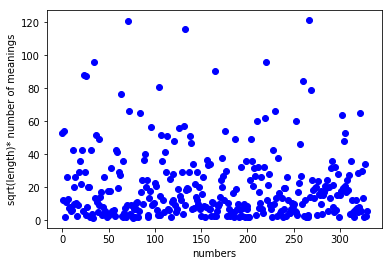

In [84]:
import math
word=random.choices(list(types),k=1000)

numbofmean = list()
for i in word:
	lword=set()
	for syn in wordnet.synsets(i):
		for l in syn.lemmas():
			lword.add(l.name())
	if len(lword)!=0:
		numbofmean.append([len(i),len(lword)])


length=[math.sqrt(i[0])*i[1] for i in numbofmean] #sqrt(length of word)* (number of meanings) = constant according to Zipf's Law.
number=[i for i in range (len(numbofmean))]

plt.xlabel('numbers')
plt.ylabel('sqrt(length)* number of meanings')
plt.scatter(number,length,c=(0,0,1))
plt.show() 

#Question 3

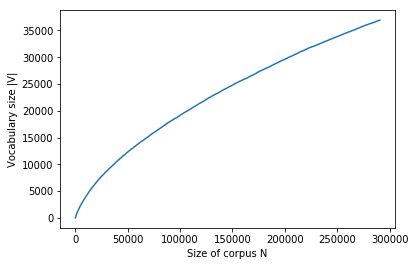

In [80]:
arrx=[]
arry=[]
i=0
types=set()
for token in tokens:
  arrx.append(i+1)
  types.add(token)
  arry.append(len(types))
  i=i+1
plt.xlabel('Size of corpus N')
plt.ylabel('Vocabulary size |V|')
plt.plot(arrx,arry)
plt.show()  